# Generate small-world Graph and Convert to Adjacency Matrix

<font size="2">This code generates a small-world network using the Watts-Strogatz model in NetworkX, and then converts the network to an adjacency matrix. The resulting matrix is saved to a text file called "matrix.txt", with each row of the matrix on a separate line and the entries in each row separated by a single space.</font>

<font size="2">The nx.watts_strogatz_graph() function generates a small-world network with N nodes, where each node is initially connected to its K nearest neighbors in a ring lattice structure. Each edge is then rewired with a probability of P, which creates random long-range connections and results in a small-world network.</font>

<font size="2">The code then creates an empty matrix with N rows and N columns using a list comprehension. It then iterates over each node in the graph, using G.edges(i) to obtain the set of edges connected to the node. For each edge, the code sets the corresponding entry in the matrix to 1. Finally, the code writes the matrix to a text file.</font>

<font size="2">Overall, this code demonstrates how to generate a small-world network and convert it to an adjacency matrix in Python using the NetworkX library. The adjacency matrix can be used as input for various graph algorithms that operate on matrices, such as matrix multiplication and eigenvalue decomposition.</font>

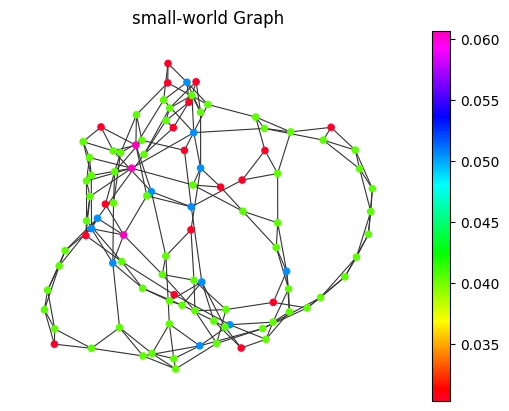

In [4]:
import networkx as nx
import matplotlib.pyplot as plt

# Set the parameters
N = 100  # number of nodes
K = 4    # each node is connected to K nearest neighbors
P = 0.1  # probability of rewiring each edge

# Generate the small-world network
G = nx.watts_strogatz_graph(N, K, P)


matrix = [[0 for j in range(N)] for i in range(N)]
for i in range(0,N):
    connections = G.edges(i)
    # Print each connection
    for connection in connections:
        #print(connection[1])
        matrix[i][connection[1]]=1
with open("matrix.txt", "w") as f:
    # Write each row to the file
    for row in matrix:
        # Convert the numbers to strings and join them into a space-separated string
        row_str = " ".join(str(num) for num in row)
        # Write the row to the file and add a newline character
        f.write(row_str + "\n")
        
import scipy
import matplotlib.pyplot as plt                                       #import matplotlib library
def draw(G, pos, measures, measure_name):
    nodes = nx.draw_networkx_nodes(G, pos, node_size=20,
                                   cmap=plt.cm.gist_rainbow,
                                   node_color=list(measures.values()))
    nx.draw_networkx_labels(G, pos, {})  # exclude labels argument
    edges = nx.draw_networkx_edges(G, pos, width=0.8, edge_color='0.2')
    plt.title(measure_name)
    plt.colorbar(nodes)
    plt.axis('off')
    plt.savefig('plot.png')
    plt.show()

pos = nx.spring_layout(G, seed=675)
draw(G, pos, nx.degree_centrality(G), 'small-world Graph')